<a href="https://colab.research.google.com/github/ishanjogalekar/Unravel2.0_Hack/blob/main/Unravel2_0_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset analysis and tests

In [139]:
# Import libs
import pandas as pd
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# Read data
df=pd.read_csv("student_prediction.csv")

In [141]:
# Cleaning of data
df.fillna(df.mean())

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,KIDS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,2,1,2,2,2,2,4,3,3,2,1,1,1,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,2,1,1,5,1,2,1,3,2,2,2,1,2,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,1,3,4,4,1,2,4,2,2,2,1,1,1,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,3,4,4,1,1,3,3,2,2,1,1,1,1,2,1,2,1,2,1,5,3,9,4


In [142]:
df.isnull().values.any()

False

### Regression Plots

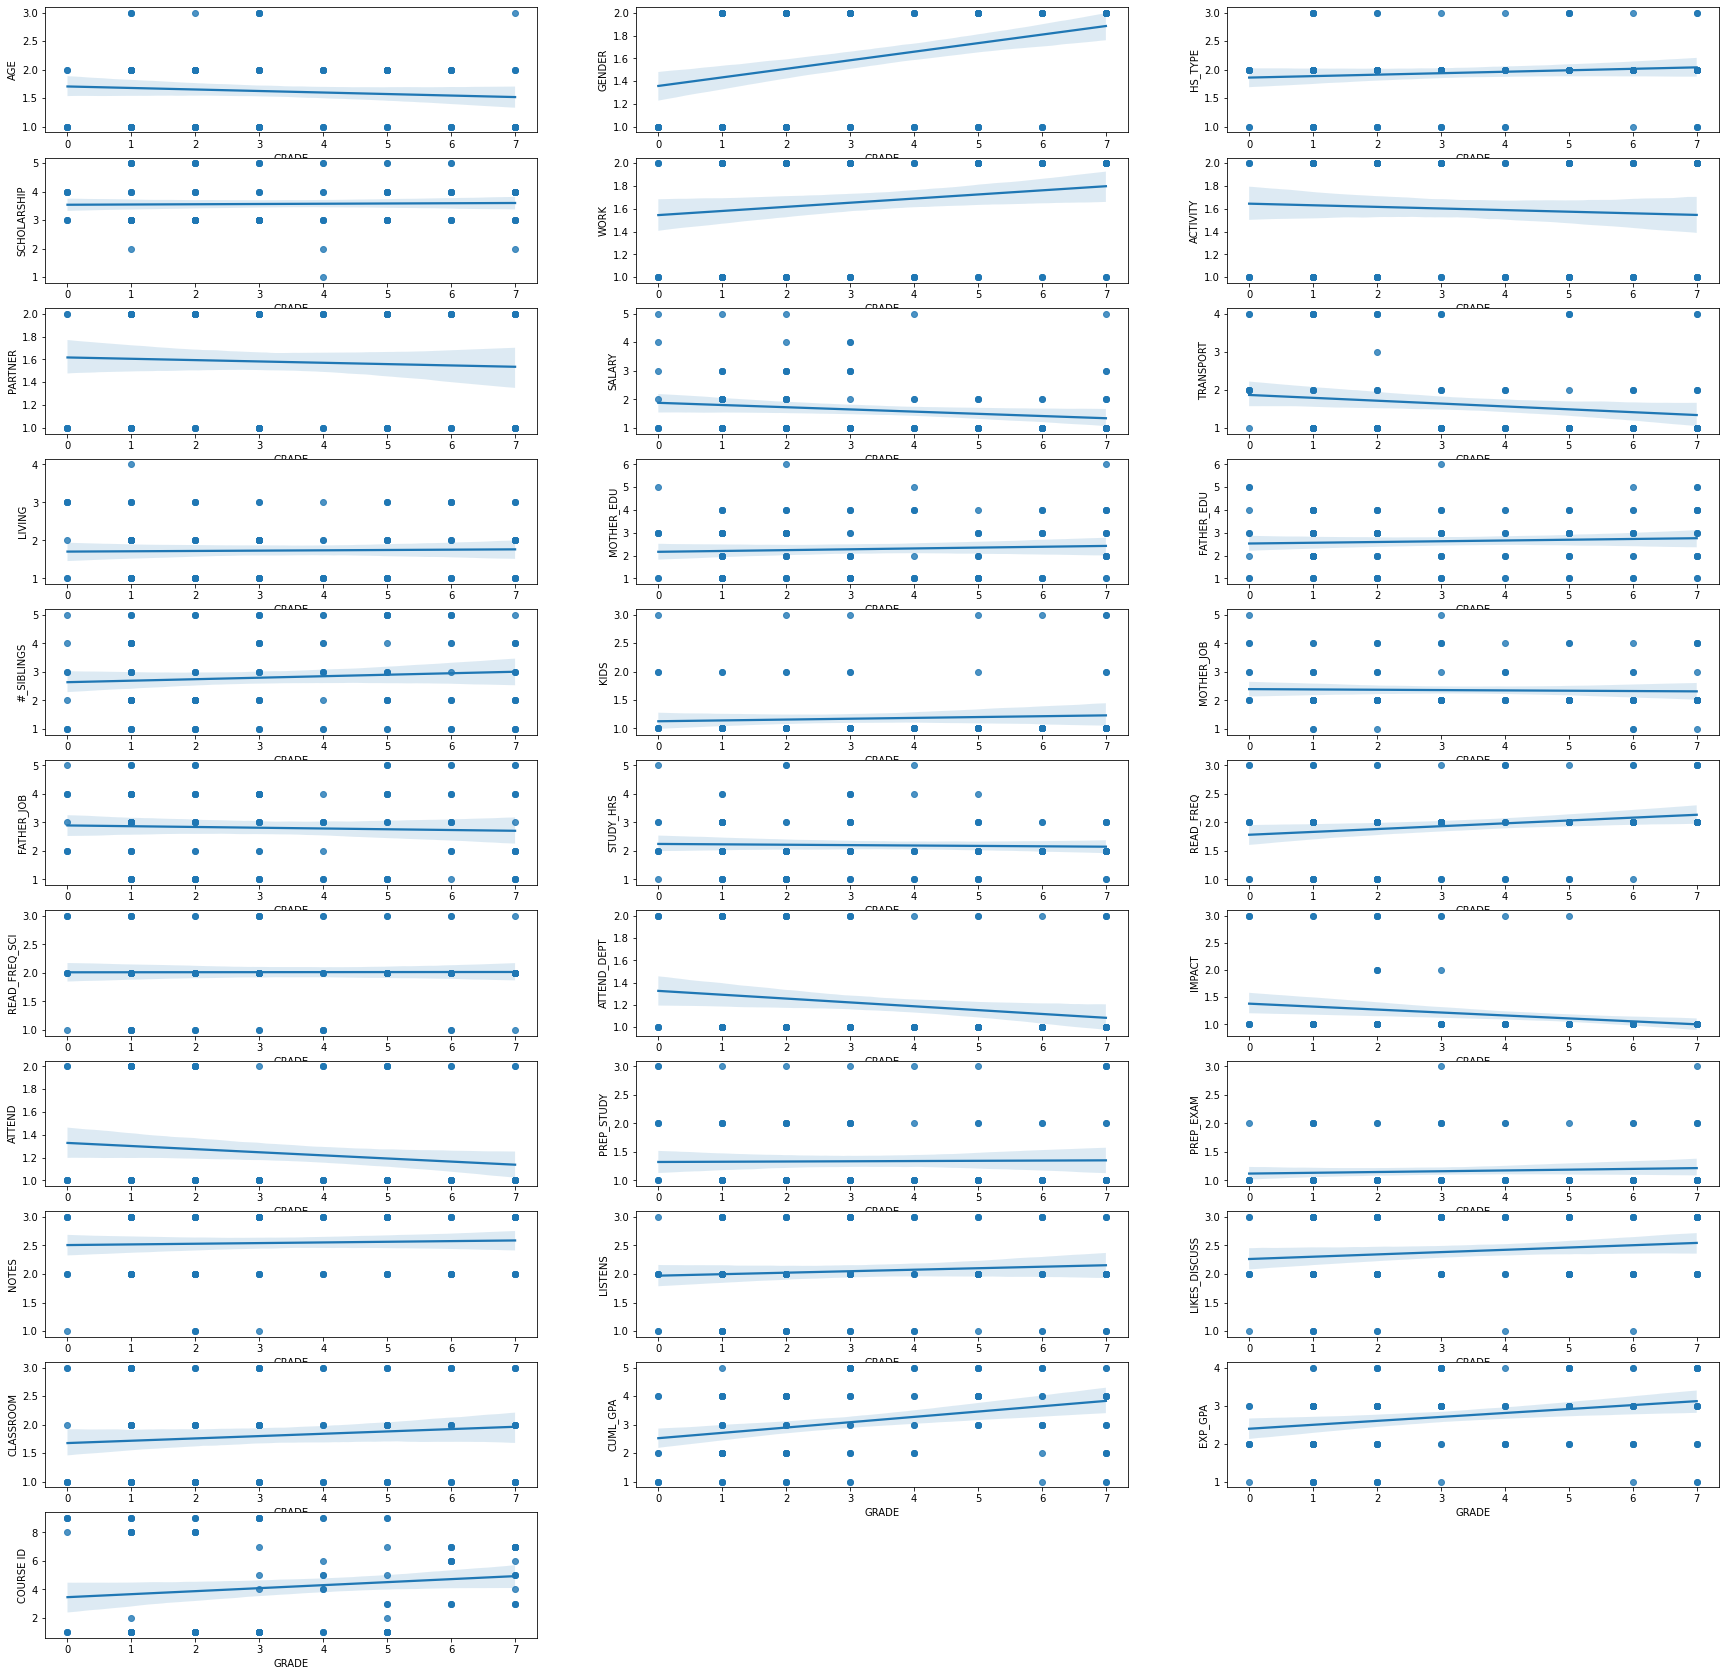

In [143]:
n = 32
plt.figure(figsize=(30,30))
for i in range(1,n):
  plt.subplot(11,3,i)
  sns.regplot(x=df.iloc[:,32],y=df.iloc[:,i],data=df)

In [144]:
# Creating required list from data 
df1 = df.columns.tolist()
df1.remove('GRADE')
df1.remove('STUDENTID')
df1.remove('AGE')
df1.remove('SCHOLARSHIP')
df1.remove('ACTIVITY')
df1.remove('PARTNER')
df1.remove('TRANSPORT')
df1.remove('LIVING')
df1.remove('MOTHER_EDU')
df1.remove('FATHER_EDU')
df1.remove('#_SIBLINGS')
df1.remove('KIDS')
df1.remove('MOTHER_JOB')
df1.remove('FATHER_JOB')
df1.remove('STUDY_HRS')
df1.remove('READ_FREQ_SCI')
df1.remove('PREP_STUDY')
df1.remove('PREP_EXAM')
df1.remove('NOTES')
df1.remove('LISTENS')
print(df1)

['GENDER', 'HS_TYPE', 'WORK', 'SALARY', 'READ_FREQ', 'ATTEND_DEPT', 'IMPACT', 'ATTEND', 'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA', 'COURSE ID']


In [145]:
X = df[df1].copy()
X.columns

Index(['GENDER', 'HS_TYPE', 'WORK', 'SALARY', 'READ_FREQ', 'ATTEND_DEPT',
       'IMPACT', 'ATTEND', 'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA',
       'COURSE ID'],
      dtype='object')

In [146]:
y=df[['GRADE']].copy()

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### Regression Model

In [148]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [149]:
print(X_test)

     GENDER  HS_TYPE  WORK  SALARY  ...  CLASSROOM  CUML_GPA  EXP_GPA  COURSE ID
29        2        3     2       1  ...          2         4        3          1
111       1        1     2       1  ...          3         4        3          8
88        2        2     2       1  ...          3         5        3          6
105       2        2     1       1  ...          1         3        3          7
117       1        1     2       1  ...          1         2        3          8
62        2        2     2       1  ...          2         5        4          1
104       1        2     2       1  ...          2         1        1          7
11        1        1     1       4  ...          3         4        3          1
32        1        2     2       2  ...          1         2        3          1
28        2        2     2       1  ...          3         5        4          1
15        2        2     2       1  ...          3         2        2          1
37        2        2     1  

In [150]:
y_prediction =  LR.predict(X_test)
y_prediction

array([[4.36786256],
       [2.95490617],
       [6.1577522 ],
       [4.86223124],
       [1.30033992],
       [4.32543816],
       [3.53518883],
       [1.53302686],
       [1.19528813],
       [4.67750364],
       [0.81743091],
       [3.86038   ],
       [4.13621881],
       [4.51560177],
       [1.73282059],
       [4.18614709],
       [1.88093606],
       [2.73928627],
       [5.11522769],
       [4.14254485],
       [2.28318951],
       [1.96483517],
       [5.04055456],
       [3.97824378],
       [2.34973394],
       [3.062925  ],
       [1.45074524],
       [1.87694154],
       [2.90759753]])

In [151]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(y_test,y_prediction)
print("R Sqaure score: ",score)
mse=mean_squared_error(y_test,y_prediction)
print("Mean Square error: ",mse)
rmse=np.sqrt(mean_squared_error(y_test,y_prediction))
print("Root MSE: ",rmse)

R Sqaure score:  0.20280137320927005
Mean Square error:  4.028649421950775
Root MSE:  2.007149576377101


### Decision Tree Model

In [152]:
grade_classifier = DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=0)
grade_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=13, random_state=0)

In [153]:
predictions = grade_classifier.predict(X_test)

In [154]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.3448275862068966

In [155]:
from sklearn.metrics import r2_score

In [156]:
list1 = []
for i in range(1,n):
  r2 = r2_score(df['GRADE'],df.iloc[:,i])
  list1.append(r2)

In [157]:
print(list1)

[-0.6693274894393428, -0.4522142672986531, -0.3515657537234991, -0.14164171112389168, -0.48528449318763234, -0.6305059199174976, -0.640570771275013, -0.9036947424786306, -0.9223866092854449, -0.5773059913134877, -0.422019713226107, -0.2796739583126746, -0.31561985601808673, -0.9008190706621975, -0.3141820201098702, -0.45652777502330255, -0.422019713226107, -0.3084306764770044, -0.36594411280566397, -0.9497054915415581, -1.031662138309898, -0.9151974297443624, -0.8145489161692081, -0.8936298911211151, -0.14020387521567512, -0.32856037919203507, -0.14020387521567512, -0.4752196418301169, 0.020833746504571482, -0.019425658925490197, -1.9490014477520177]
